# Capstone

## Problem Statement
Predicting the next trending video game genre based on past sales and data

## Formulating your Problem Statement
Your problem statement should the guiding principle for your project. You can think about this as a "SMART" goal.

### Specific:
What precisely do you plan to do?
What type of model will you need to develop?

<b>Take a look at past video game data including genre and sales and predict the next genre hit. The multinomial logistic regression model will be utilized since there can be more than one possibilities and not everyone will enjoy the same genre.
</b>

### Measurable:
What metrics will you be using to assess performance?
MSE? Accuracy? Precision? AUC?

<b>Accuracy, Precision, and Recall or collectively the confusion matrix will be used as the metrics to asses the model performance.
</b>
    
### Achievable:
Is your project appropriately scoped?
Is it too aggressive? Too easy?
Note: If your project is too big, break it up into smaller pieces. Sometimes a good project is the simply one part of a larger, longer-term agenda.

<b>It's a bit challenging as a good number of rows contain null values in the critic and user ratings. Also, the dataset includes old platforms such 3DO and the Nintendo hardware. However, being familiar with video games, the said titles for those ratings happened to do well or entertained me and by dropping the rows, I would be losing valuable information.
</b>
    
### Relevant:
Does anyone care about this?
Why should people be interested in your results?
What value will the completion of your project be adding?

    
<b>Video games has become such a sensation that tournaments and even films are made around video games such as smash brothers and sonic the hedgehog. Some people may be limited to certain genre soley because of the popularity but seeing genre being sold and played may increase intrest and possibly sales.

Completing this project will add on to the value of video games as its own entity competing with books, tv, and films with their own genre as well.</b>
    
### Time-bound
What's your deadline?
<br>
<b>The project is due March 13 so less than 3 weeks is the time given to complete this project.
</b>

## Data Dictionary
[Link](https://www.kaggle.com/sidtwr/videogames-sales-dataset)

## Import

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Kaggle Video Games Sales Dataset
#https://www.kaggle.com/sidtwr/videogames-sales-dataset
df = pd.read_csv('../datasets/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()                 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(16719, 16)

In [4]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [13]:
list(df['Platform'].unique())

['Wii',
 'NES',
 'GB',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'SNES',
 'GBA',
 'PS4',
 '3DS',
 'N64',
 'PS',
 'XB',
 'PC',
 '2600',
 'PSP',
 'XOne',
 'WiiU',
 'GC',
 'GEN',
 'DC',
 'PSV',
 'SAT',
 'SCD',
 'WS',
 'NG',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

In [18]:
df['Publisher'].value_counts().head()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
Name: Publisher, dtype: int64

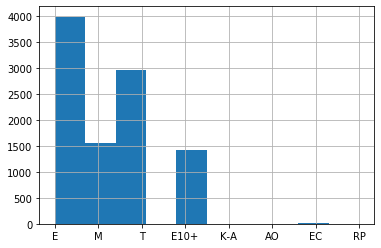

In [19]:
df['Rating'].hist()

In [21]:
df['Developer'].head()

0    Nintendo
1         NaN
2    Nintendo
3    Nintendo
4         NaN
Name: Developer, dtype: object

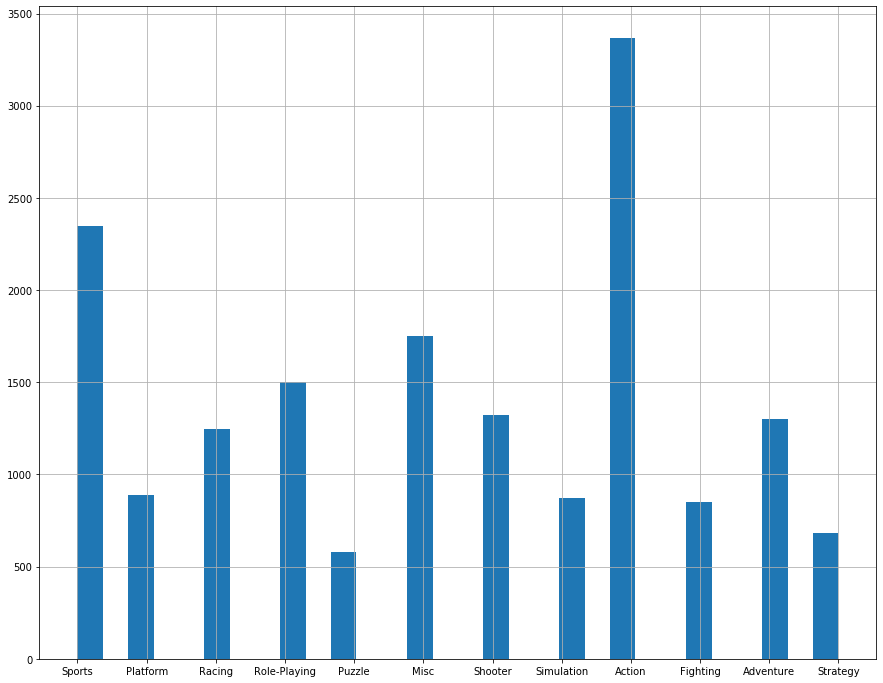

In [43]:
df['Genre'].hist(figsize = (15,12),bins=30)

In [47]:
df['Global_Sales'].sort_values().head()

16718    0.01
16296    0.01
16295    0.01
16294    0.01
16293    0.01
Name: Global_Sales, dtype: float64

In [50]:
df['Global_Sales'].sort_values(ascending= False).head()

0    82.53
1    40.24
2    35.52
3    32.77
4    31.37
Name: Global_Sales, dtype: float64

## Findings
Based on some EDA, I guess the reason for the missing values in the critic and user rating columns corresponds to the popularity of the gaming platform and video games in general.

For example, Nintendo is well known so even newer gamers may have heard of the old Nintendo platform or even the unpopular Virtual Boy. On the other hand, the 3DO and PCFX did poor in sales and become unheard as a result. This was back when video games was making a name for itself and just starting out.

I'm thinking maybe deleting rows containing the unpopular platforms and see if there is a better chance of seeing les null values.